In [53]:
# Written by Rahi Misra
import pandas as pd

merged_data_combined = pd.read_csv("merged_data_combined.csv")

# Drop features that cannot be known before match/are redundant
features_to_keep = [
    'tourney_name', 'surface', 'tourney_level', 'tourney_date', 'score', 'best_of',
    'round', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
    'winner_rank', 'loser_rank', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
    'loser_age'
]

merged_data_combined = merged_data_combined[features_to_keep]

merged_data_combined.to_csv("merged_data_selected_features.csv", index=False)


C:\Users\user\AppData\Local\Temp\ipykernel_10292\1366231441.py:4: DtypeWarning: Columns (3,4,5,8,9,12,16,17,45,47) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_data_combined = pd.read_csv("merged_data_combined.csv")


In [54]:
df = pd.read_csv("merged_data_selected_features.csv", header=0)

C:\Users\user\AppData\Local\Temp\ipykernel_10292\3790951559.py:2: DtypeWarning: Columns (2,3,9,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_data_selected_features.csv", header=0)


In [55]:
# Get the list of feature names
feature_names = df.columns.tolist()

feature_names

['tourney_name',
 'surface',
 'tourney_level',
 'tourney_date',
 'score',
 'best_of',
 'round',
 'winner_name',
 'winner_hand',
 'winner_ht',
 'winner_ioc',
 'winner_age',
 'winner_rank',
 'loser_rank',
 'loser_name',
 'loser_hand',
 'loser_ht',
 'loser_ioc',
 'loser_age']

In [56]:
# Get the data types for each feature
data_types = df.dtypes

data_types

tourney_name      object
surface           object
tourney_level     object
tourney_date      object
score             object
best_of            int64
round             object
winner_name       object
winner_hand       object
winner_ht         object
winner_ioc        object
winner_age       float64
winner_rank       object
loser_rank        object
loser_name        object
loser_hand        object
loser_ht         float64
loser_ioc         object
loser_age        float64
dtype: object

In [57]:
# Remove 'R' from winner height (Found through checking unique height values (accidentally deleted))
non_numeric_values = df[df['winner_ht'].str.contains('R', na=False)]['winner_ht'].unique()

df['winner_ht'] = df['winner_ht'].replace({'R': ''}, regex=True)

df['winner_ht'] = pd.to_numeric(df['winner_ht'], errors='coerce')

In [58]:
# Get the data types for each feature
data_types = df.dtypes

data_types

tourney_name      object
surface           object
tourney_level     object
tourney_date      object
score             object
best_of            int64
round             object
winner_name       object
winner_hand       object
winner_ht        float64
winner_ioc        object
winner_age       float64
winner_rank       object
loser_rank        object
loser_name        object
loser_hand        object
loser_ht         float64
loser_ioc         object
loser_age        float64
dtype: object

In [59]:
# Count the unique values in tourney name
tourney_counts = df['tourney_name'].value_counts()

tourney_counts

tourney_name
US Open                       21728
Wimbledon                     21465
Australian Open               14705
Roland Garros                 13353
M15 Monastir                   5085
                              ...  
Cannes Chps                       1
Fed Cup G2 RRD: ALG vs LES        1
Fed Cup G2 RRB: BIH vs LIE        1
Fed Cup G2 RRC: GEO vs LTU        1
Fed Cup G2 RR: IND vs PHI         1
Name: count, Length: 13812, dtype: int64

array([[<Axes: xlabel='winner_age', ylabel='winner_age'>,
        <Axes: xlabel='loser_age', ylabel='winner_age'>,
        <Axes: xlabel='winner_ht', ylabel='winner_age'>,
        <Axes: xlabel='loser_ht', ylabel='winner_age'>],
       [<Axes: xlabel='winner_age', ylabel='loser_age'>,
        <Axes: xlabel='loser_age', ylabel='loser_age'>,
        <Axes: xlabel='winner_ht', ylabel='loser_age'>,
        <Axes: xlabel='loser_ht', ylabel='loser_age'>],
       [<Axes: xlabel='winner_age', ylabel='winner_ht'>,
        <Axes: xlabel='loser_age', ylabel='winner_ht'>,
        <Axes: xlabel='winner_ht', ylabel='winner_ht'>,
        <Axes: xlabel='loser_ht', ylabel='winner_ht'>],
       [<Axes: xlabel='winner_age', ylabel='loser_ht'>,
        <Axes: xlabel='loser_age', ylabel='loser_ht'>,
        <Axes: xlabel='winner_ht', ylabel='loser_ht'>,
        <Axes: xlabel='loser_ht', ylabel='loser_ht'>]], dtype=object)

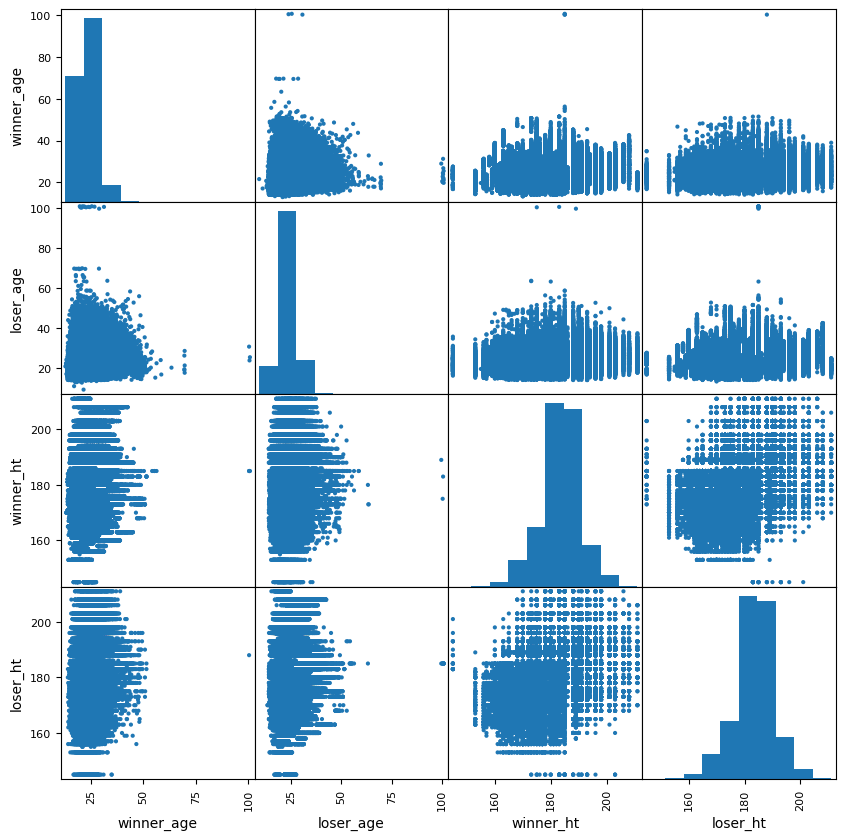

In [60]:
# Make a scatter plot matrix to examine the correlation between each of the numeric features
from pandas.plotting import scatter_matrix

numeric_feature_names = ['winner_age', 'loser_age', 'winner_rank', 'loser_rank', 'winner_ht', 'loser_ht']
scatter_matrix(df[numeric_feature_names], figsize=(10, 10), alpha=1)

C:\Users\user\anaconda3\envs\datascience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


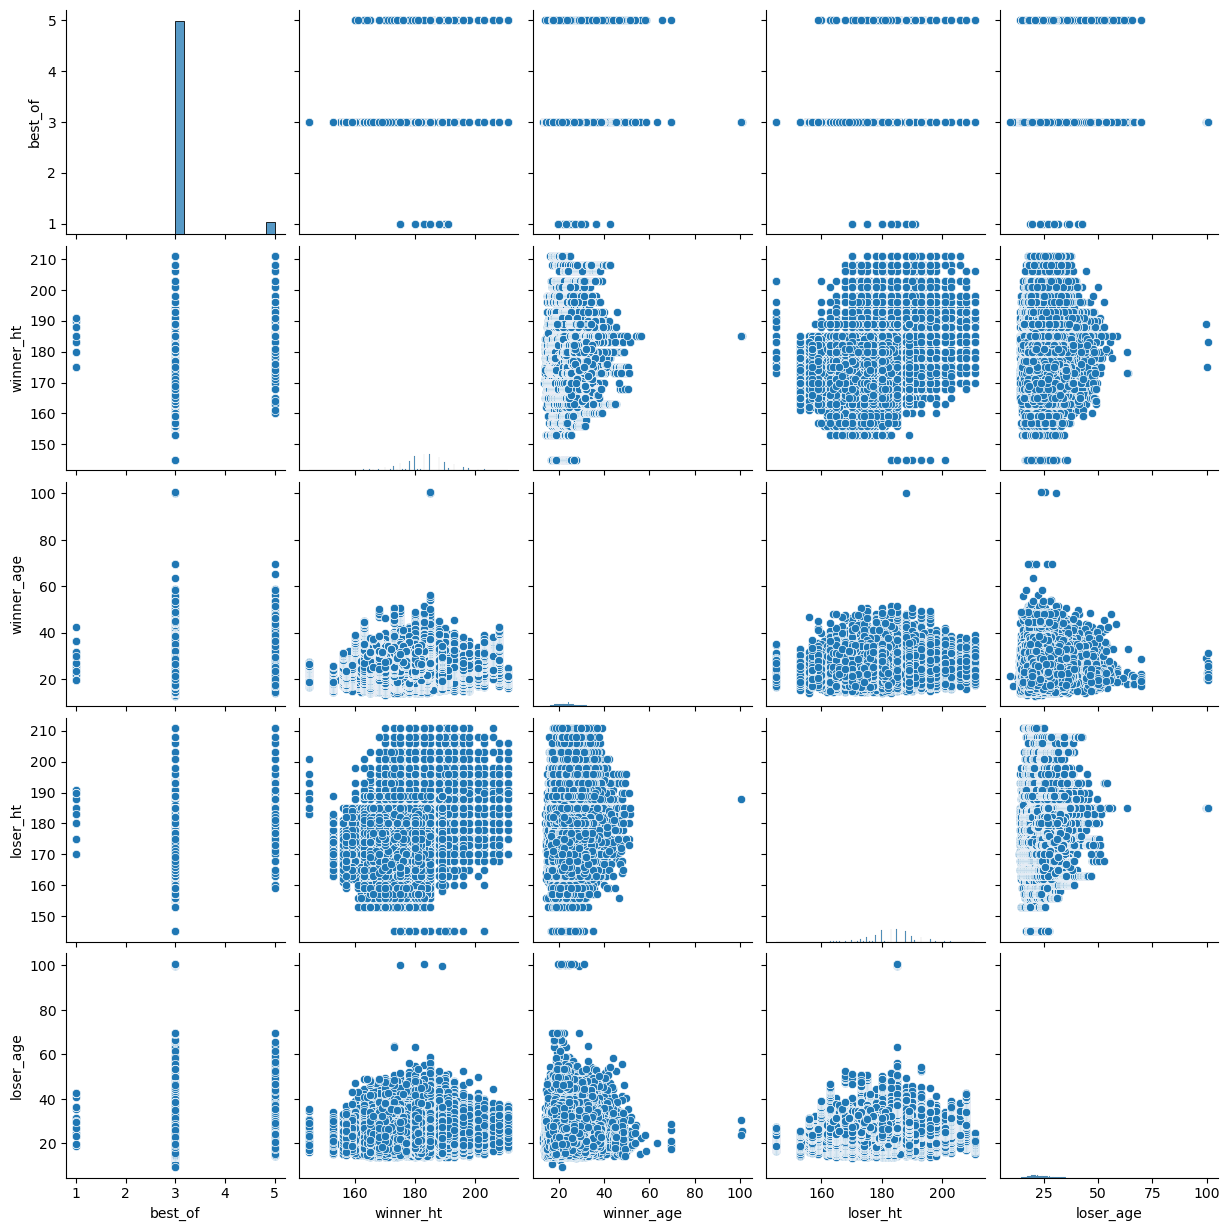

In [61]:
# Make a scatter plot matrix to examine the correlation between each of the features
sns.pairplot(df[feature_names])
plt.show()

In [62]:
# Convert date to datetime format
df = df[df['tourney_date'].notna()]
df = df[df['tourney_date'].astype(str).str.isnumeric()]

df['tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')

In [63]:
# Filter out matches from 1984 and before
df = df[df['tourney_date'].dt.year > 1984]

In [64]:
df.to_csv('filtered_years.csv', index=False)

In [67]:
filtered_data = pd.read_csv("filtered_years.csv", header=0)

C:\Users\user\AppData\Local\Temp\ipykernel_10292\670708559.py:2: DtypeWarning: Columns (2,12) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_data = pd.read_csv("filtered_years.csv", header=0)


In [68]:
# Get the data types for each feature
new_data_types = filtered_data.dtypes

new_data_types

tourney_name      object
surface           object
tourney_level     object
tourney_date      object
score             object
best_of            int64
round             object
winner_name       object
winner_hand       object
winner_ht        float64
winner_ioc        object
winner_age       float64
winner_rank       object
loser_rank       float64
loser_name        object
loser_hand        object
loser_ht         float64
loser_ioc         object
loser_age        float64
dtype: object

In [69]:
# Display all unique tournament names
unique_tourney_names = df['tourney_name'].unique()

for name in unique_tourney_names:
    print(name)


Masters
Auckland
Toronto Indoor
Buenos Aires
Nancy
Nice
Bari
Marbella
Munich
Madrid
Florence
Queen's Club
Bologna
Bristol
Gstaad
Newport
Bastad
Hilversum
Livingston
Kitzbuhel
Cleveland
Stuttgart Outdoor
Geneva
Bordeaux
Palermo
Brisbane
Toulouse
Basel
Tokyo Outdoor
Tel Aviv
Melbourne Indoor
Cologne
Hong Kong
Vienna
Sydney Outdoor
Adelaide
Melbourne
Philadelphia
Memphis
Delray Beach
Houston
Brussels
Rotterdam
Milan
Monte Carlo
Chicago
Atlanta
Las Vegas
Hamburg
Forest Hills
Rome
Boston
Washington
Indianapolis
Stratton Mountain
Montreal / Toronto
Cincinnati
Los Angeles
San Francisco
Barcelona
Johannesburg
Sydney Indoor
Tokyo Indoor
Stockholm
Wembley
Roland Garros
Wimbledon
US Open
Australian Open
Dallas
Dusseldorf
La Quinta
Fort Myers
Davis Cup EUR R1: EGY vs ALG
Davis Cup WG R1: ARG vs ECU
Davis Cup WG PO: ARG vs URS
Davis Cup WG QF: AUS vs PAR
Davis Cup WG SF: SWE vs AUS
Davis Cup WG R1: YUG vs AUS
Davis Cup EUR QF: GRE vs AUT
Davis Cup EUR SF: AUT vs ISR
Davis Cup EUR R1: BEL vs BUL
Dav

In [70]:
# Count of unique tournament names
unique_tourney_count = df['tourney_name'].nunique()
print(f"Number of unique tournament names: {unique_tourney_count}")

# TNumber of rows
total_rows = len(df)
print(f"Total number of rows in the dataset: {total_rows}")


Number of unique tournament names: 11801
Total number of rows in the dataset: 1155358


In [72]:
# Drop tourney name
column_to_drop = 'tourney_name'

filtered_data = filtered_data.drop(columns=[column_to_drop])

filtered_data.to_csv('no_tourney_name.csv', index=False)

In [73]:
no_tourney_name = pd.read_csv("no_tourney_name.csv", header=0)

C:\Users\user\AppData\Local\Temp\ipykernel_10292\353263544.py:2: DtypeWarning: Columns (1,11) have mixed types. Specify dtype option on import or set low_memory=False.
  no_tourney_name = pd.read_csv("no_tourney_name.csv", header=0)


In [74]:
# Get the data types for each feature
new_data_types = no_tourney_name.dtypes

new_data_types

surface           object
tourney_level     object
tourney_date      object
score             object
best_of            int64
round             object
winner_name       object
winner_hand       object
winner_ht        float64
winner_ioc        object
winner_age       float64
winner_rank       object
loser_rank       float64
loser_name        object
loser_hand        object
loser_ht         float64
loser_ioc         object
loser_age        float64
dtype: object

In [77]:
# Columns to convert to integers
columns_to_convert = ['winner_age', 'winner_ht', 'winner_rank', 'loser_age', 'loser_ht', 'loser_rank']

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

df[columns_to_convert] = df[columns_to_convert].fillna(0)

df[columns_to_convert] = df[columns_to_convert].astype(int)

df.to_csv('no_decimals.csv', index=False)